<a href="https://colab.research.google.com/github/Yassine-Chraa/CNN-Binary-ImageClassification/blob/master/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [4]:
!pip install tensorflow opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# **Data Cleaning**

In [6]:
data_dir = '/content/drive/MyDrive/data' 

In [7]:
import imghdr
import os

image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            tip = imghdr.what(image_path) #Get image extension
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# **Load Data**

In [8]:
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory(data_dir) #load our data (patch_size=32,image_size=(256,256))
data_iterator = data.as_numpy_iterator() #grap the data
batch = data_iterator.next()
data_iterator.next()

print(batch[0].shape)
print(batch[1].shape)

Found 305 files belonging to 2 classes.
(32, 256, 256, 3)
(32,)


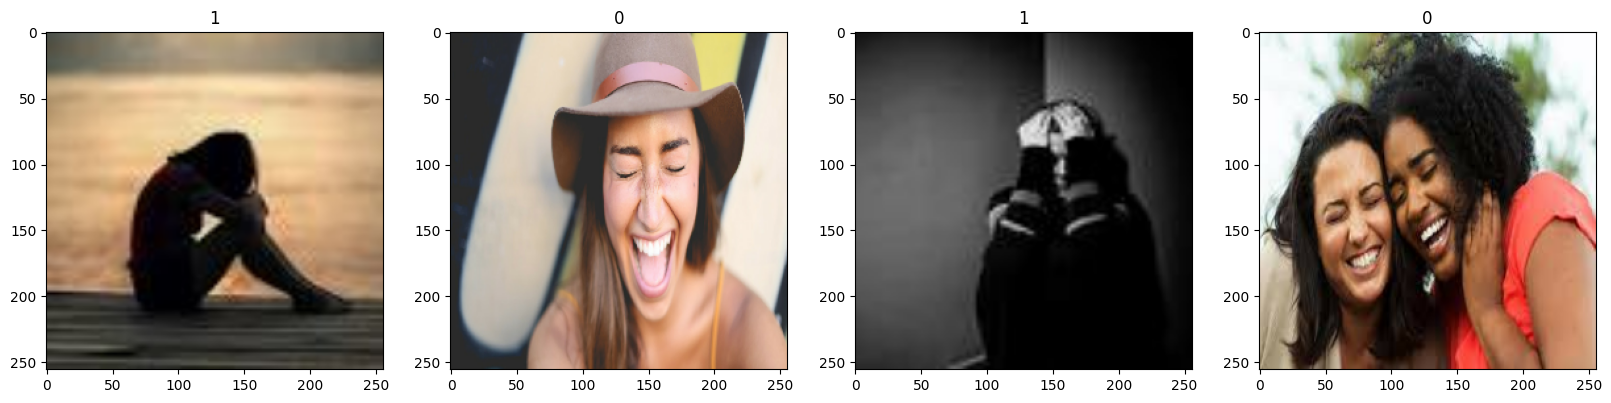

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Scale And Split Data**

In [10]:
data = data.map(lambda x,y: (x/255, y)) # x ===> images , y ==> labels
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [11]:
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.1)
val_size = int(len(data)*0.2)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Build Deep Learning Model**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [13]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# **Training**

In [14]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
7/7 [==============================] - 35s 3s/step - loss: 1.0589 - accuracy: 0.4911 - val_loss: 0.6677 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 30s 4s/step - loss: 0.6714 - accuracy: 0.4911 - val_loss: 0.6093 - val_accuracy: 0.6406
Epoch 3/20
7/7 [==============================] - 28s 4s/step - loss: 0.6435 - accuracy: 0.6473 - val_loss: 0.6137 - val_accuracy: 0.5938
Epoch 4/20
7/7 [==============================] - 29s 4s/step - loss: 0.6131 - accuracy: 0.6071 - val_loss: 0.5459 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 23s 3s/step - loss: 0.5233 - accuracy: 0.7500 - val_loss: 0.4859 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 23s 3s/step - loss: 0.4634 - accuracy: 0.7991 - val_loss: 0.3757 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 28s 4s/step - loss: 0.3380 - accuracy: 0.8571 - val_loss: 0.3950 - val_accuracy: 0.8281
Epoch 8/20
7/7 [==================

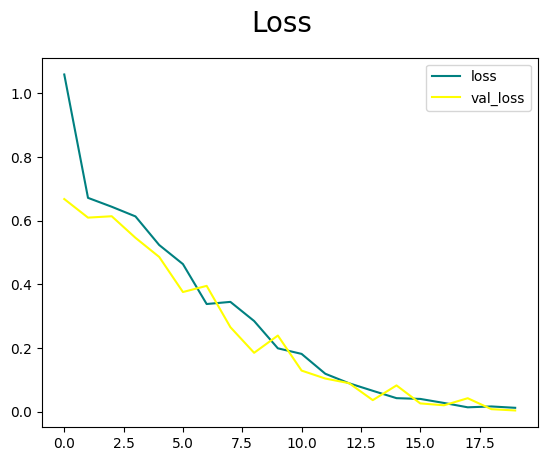

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='yellow', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

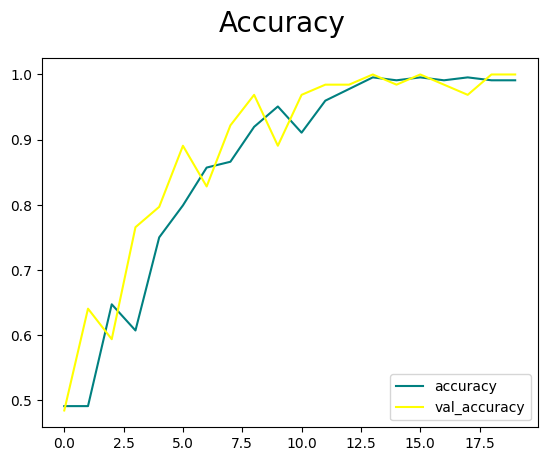

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='yellow', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# **Evaluate**

In [17]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 417ms/step


# **Test**

In [18]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

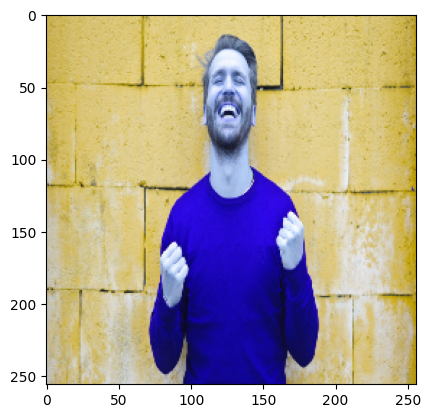

In [20]:
import cv2
img = cv2.imread('img2.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [23]:
import numpy as np
new_model = load_model('/content/models/imageclassifier.h5')
yhat = new_model.predict(np.expand_dims(resize/255, 0))
print(yhat[0][0])

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 [==============================] - 0s 405ms/step
0.10215188
Predicted class is Happy
